The dataset contains real estate sales records in NYC.
The following code performs an exploratory analysis on this dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import association_metrics as am
from dython.nominal import associations
from pathlib import Path
from openFile import OpenCleanFile


Obtain the data. An explanation for each data column can be found on the NYC website: https://www.nyc.gov/site/finance/taxes/

The data is obtained from a file derived from the original nyc-rolling-sales.csv file which was cleaned
in the Task1_clean.ipynb Jupyter Notebook. 
This code should always be run first to create this file.
---
A class was created: OpenCleanFile to create a dataframe populated by this file.
It loads the dataframe and sets the data type for each column.
This same code has to be run everytime this file is opened, which is why this class 
has been created.

In [2]:

clean = OpenCleanFile()
borough_names= ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
clean.df_housing.info()    
clean.df_housing.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   NEIGHBORHOOD                    8482 non-null   category      
 1   BUILDING CLASS CATEGORY         8482 non-null   category      
 2   TAX CLASS AT PRESENT            8482 non-null   category      
 3   Tax Block                       8482 non-null   category      
 4   RESIDENTIAL UNITS               8482 non-null   int64         
 5   COMMERCIAL UNITS                8482 non-null   int64         
 6   TOTAL UNITS                     8482 non-null   int64         
 7   LAND SQUARE FEET                8482 non-null   int64         
 8   GROSS SQUARE FEET               8482 non-null   int64         
 9   TAX CLASS AT TIME OF SALE       8482 non-null   category      
 10  BUILDING CLASS AT TIME OF SALE  8482 non-null   category      
 11  SALE

,count,mean,std,min,25%,50%,75%,max
RESIDENTIAL UNITS,8482.00000,6.25253,26.53003,0.00000,2.00000,2.00000,3.00000,948.00000
COMMERCIAL UNITS,8482.00000,0.84626,25.52568,0.00000,0.00000,0.00000,0.00000,2261.00000
TOTAL UNITS,8482.00000,7.09703,36.91645,0.00000,2.00000,3.00000,4.00000,2261.00000
LAND SQUARE FEET,8482.00000,3275.63535,10583.56031,200.00000,1742.00000,2000.00000,2500.00000,679000.00000
GROSS SQUARE FEET,8482.00000,8606.53914,31728.74181,700.00000,2295.00000,3007.50000,4180.00000,1021752.00000
SALE PRICE,8482.00000,3292418.86666,12299057.51319,2000.00000,560000.00000,975250.00000,1879752.50000,330000000.00000
SALE_MONTH,8482.00000,6.52051,3.48448,1.00000,3.00000,6.00000,9.00000,12.00000
AGE,8482.00000,86.72789,34.61093,6.00000,67.00000,96.00000,112.00000,222.00000


<AxesSubplot:title={'center':'Number of Properties per borough'}, xlabel='BOROUGH_NAME', ylabel='Count'>

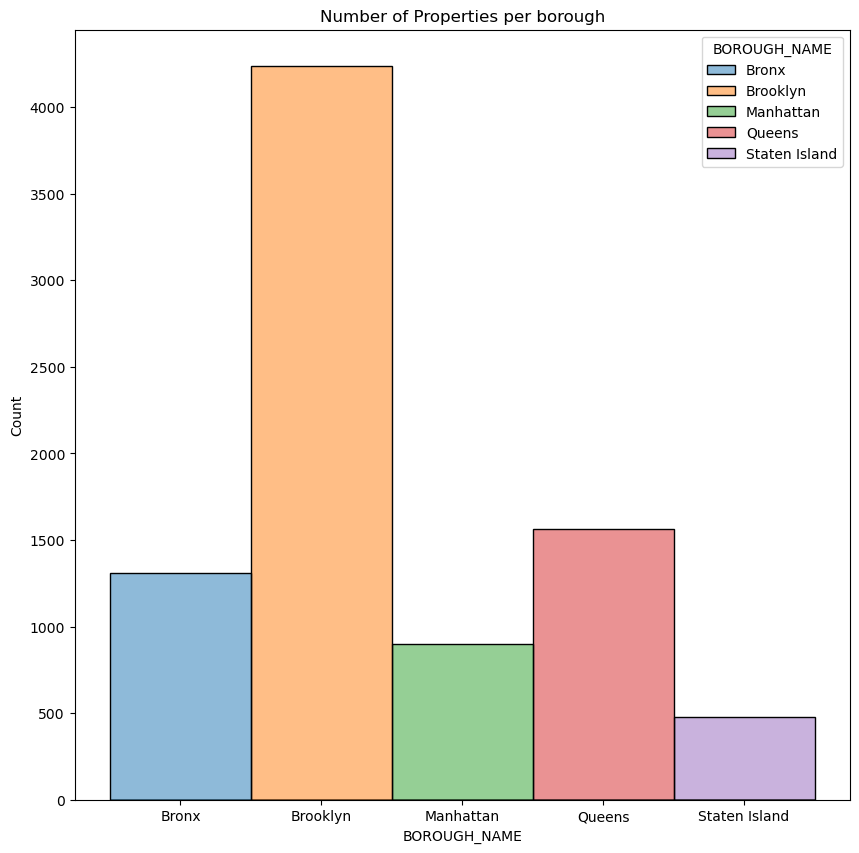

In [3]:
plt.figure(figsize = (10,10))
plt.title("Number of Properties per borough")
sns.histplot(data=clean.df_housing, x="BOROUGH_NAME", hue="BOROUGH_NAME", hue_order=borough_names)

Now the data is ready for EDA. Some of the data is categorical and some of data is continuous.

Lets look at the age of the property and the sales price

<AxesSubplot:title={'center':'Sales Prices by the age of the property'}, xlabel='AGE', ylabel='SALE PRICE'>

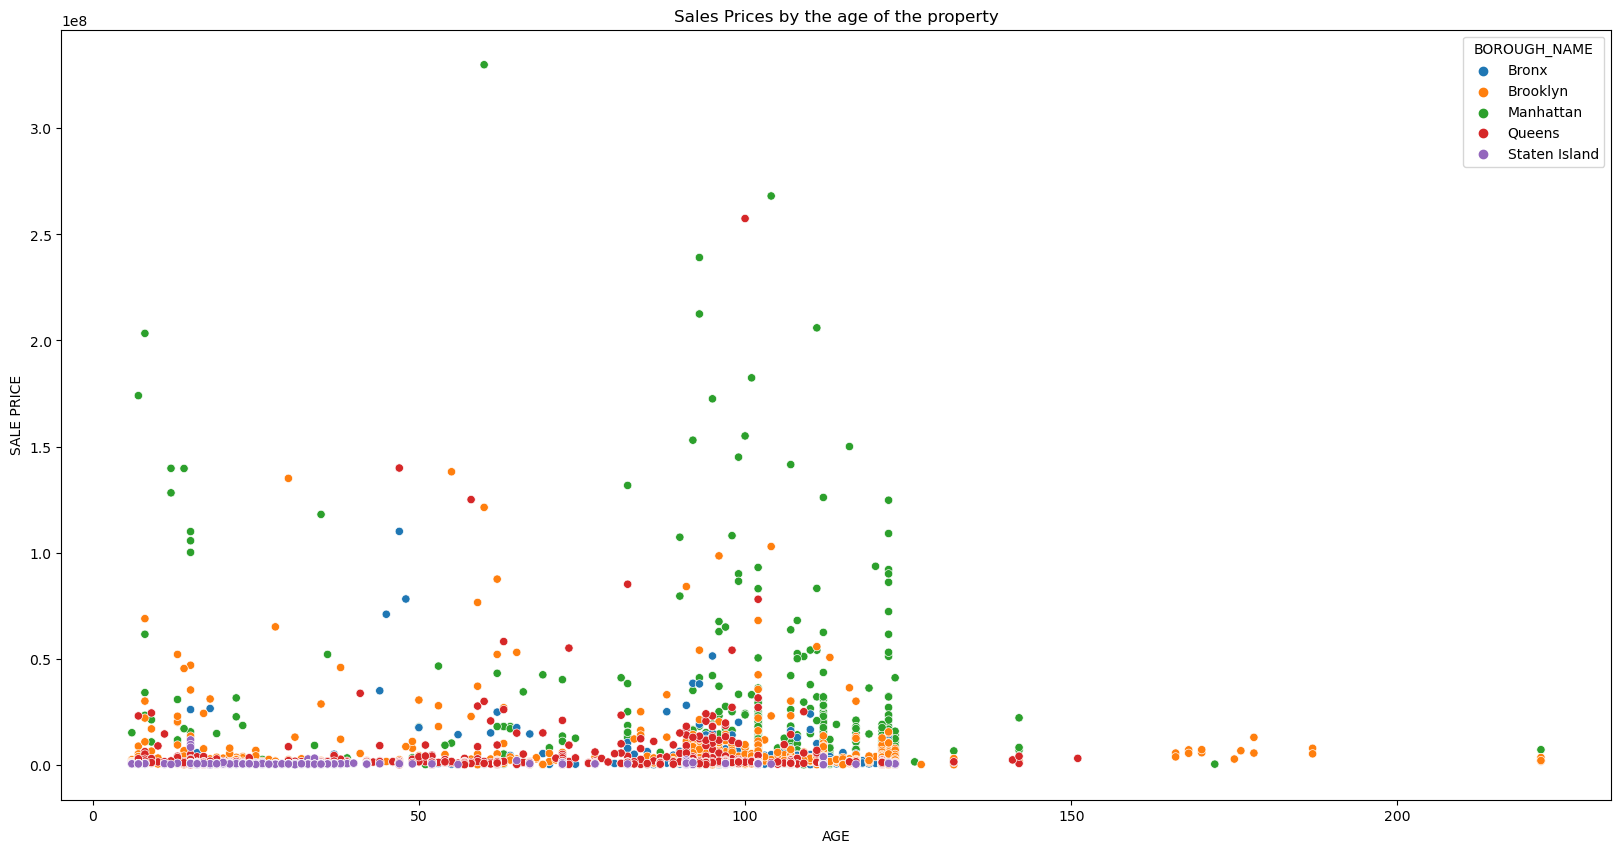

In [4]:
plt.figure(figsize = (20,10))
plt.title("Sales Prices by the age of the property")
sns.scatterplot(data=clean.df_housing, x="AGE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)


Lets see the distribution of sales prices

<AxesSubplot:title={'center':'Sales Prices over the year'}, xlabel='SALE DATE', ylabel='SALE PRICE'>

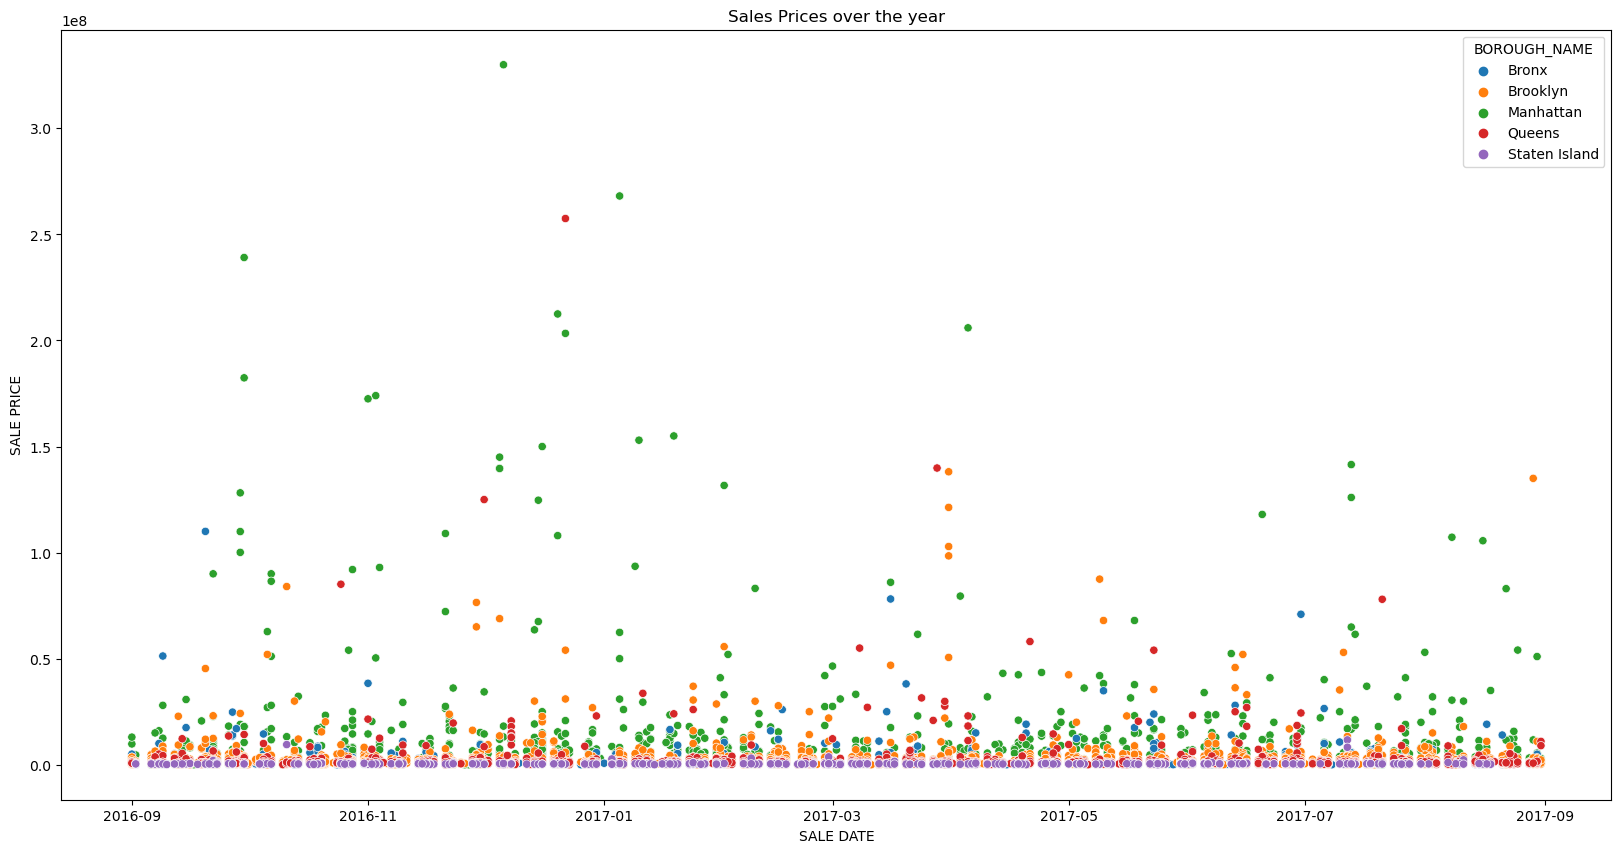

In [5]:
plt.figure(figsize = (20,10))
plt.title("Sales Prices over the year")
sns.scatterplot(data=clean.df_housing, x="SALE DATE", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:title={'center':'Sales prices per month per borough'}, xlabel='SALE_MONTH', ylabel='SALE PRICE'>

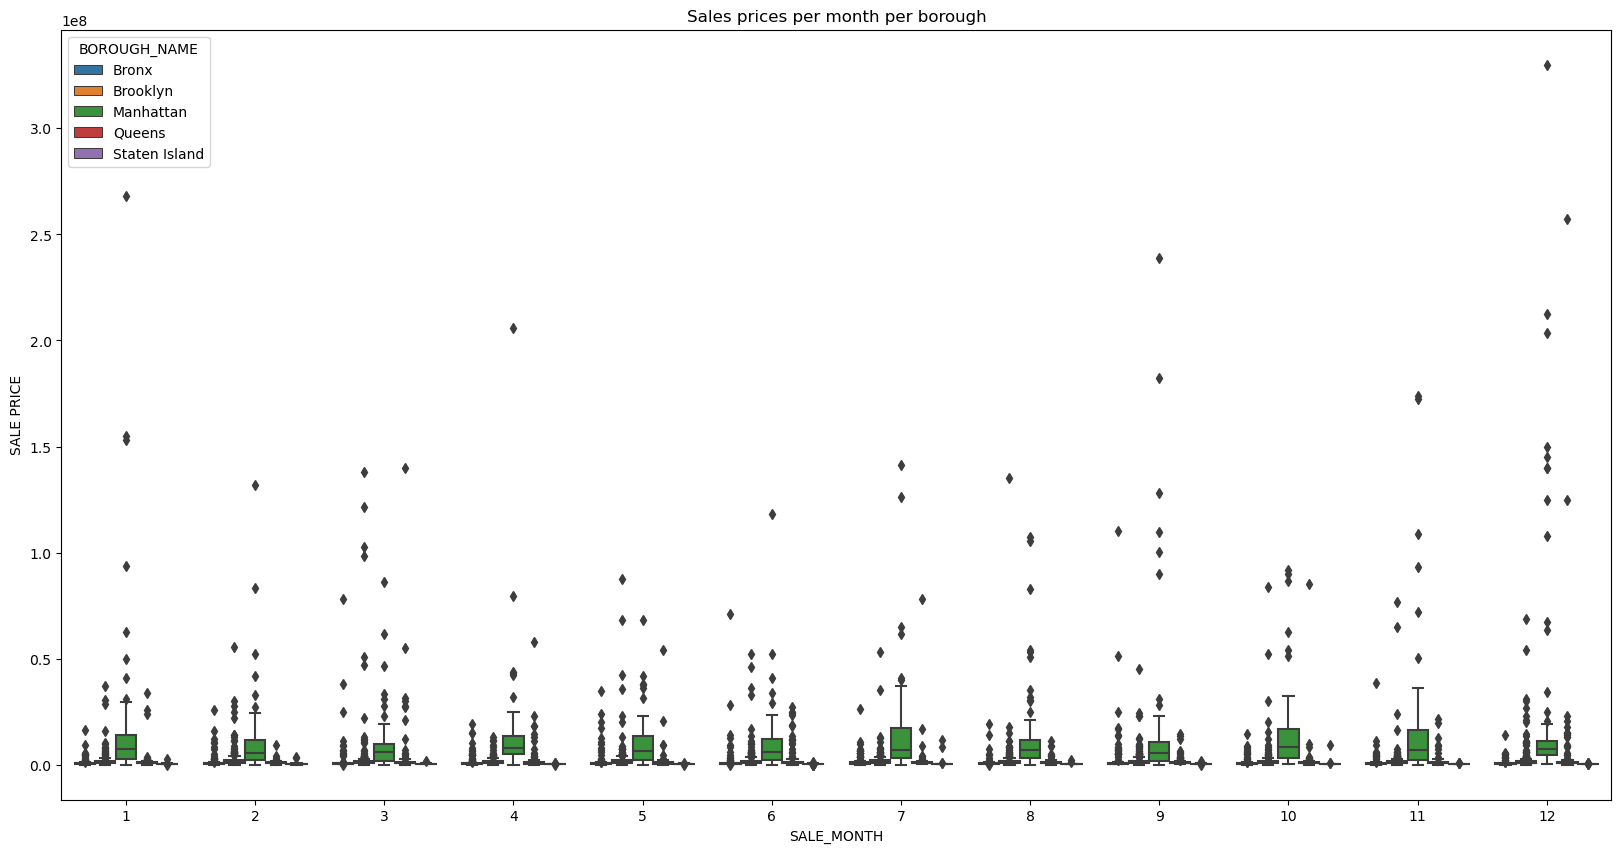

In [6]:
plt.figure(figsize = (20,10))
plt.title("Sales prices per month per borough")
sns.boxplot(data=clean.df_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

<AxesSubplot:title={'center':'Sales prices per month per borough without outliers'}, xlabel='SALE_MONTH', ylabel='SALE PRICE'>

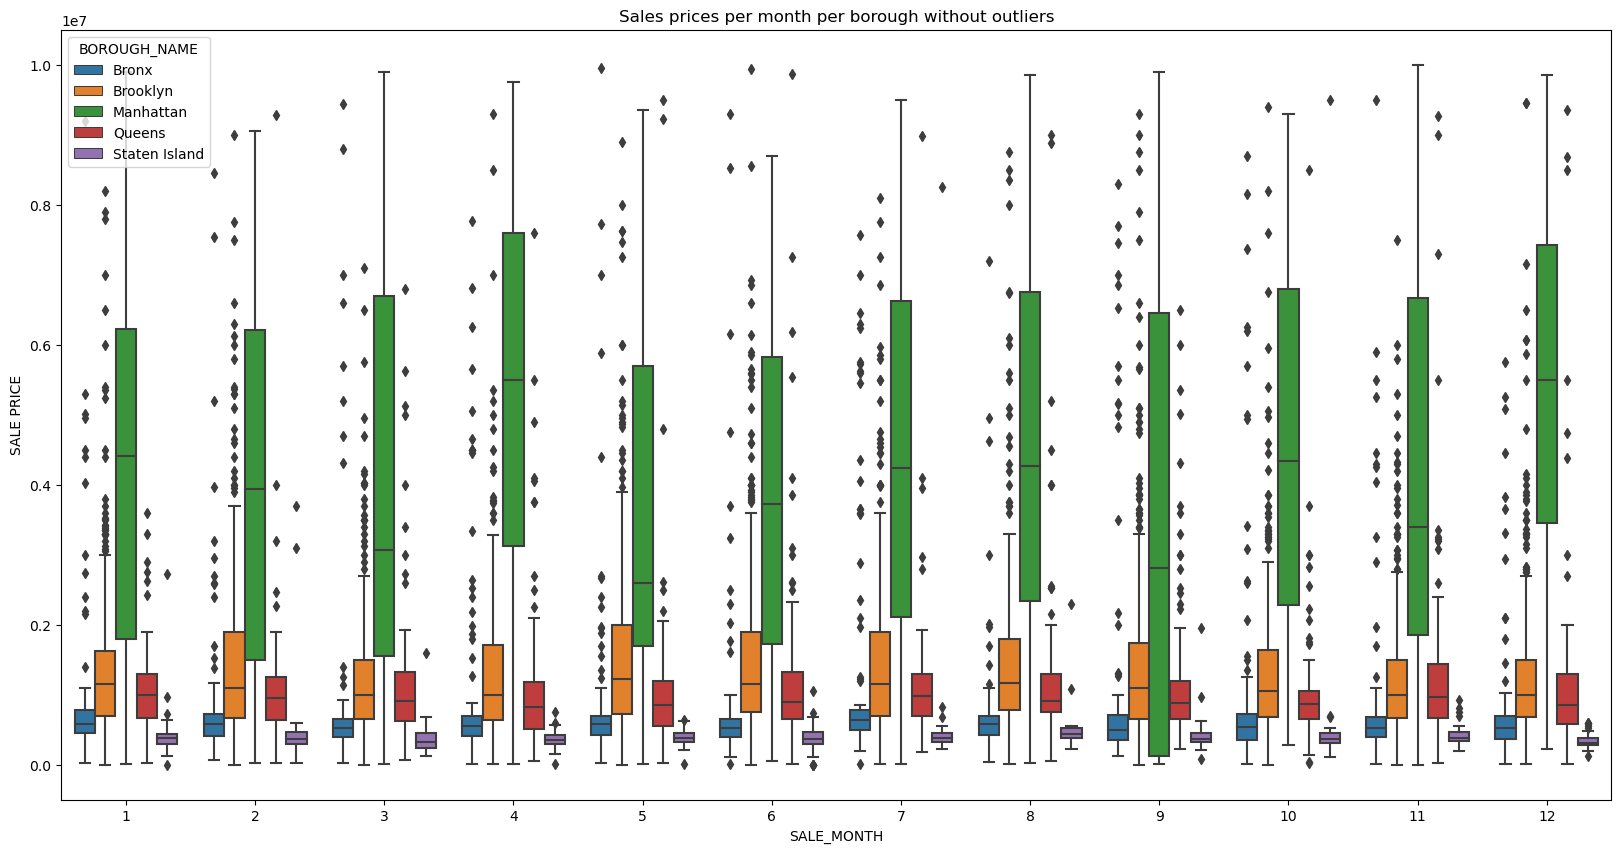

In [7]:

plt.figure(figsize = (20,10))
plt.title("Sales prices per month per borough without outliers")
df_new_housing = clean.df_housing[clean.df_housing["SALE PRICE"] < 10000000]
sns.boxplot(data=df_new_housing, x="SALE_MONTH", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

Text(0.5, 1.0, 'Residential Units for Sale Price')

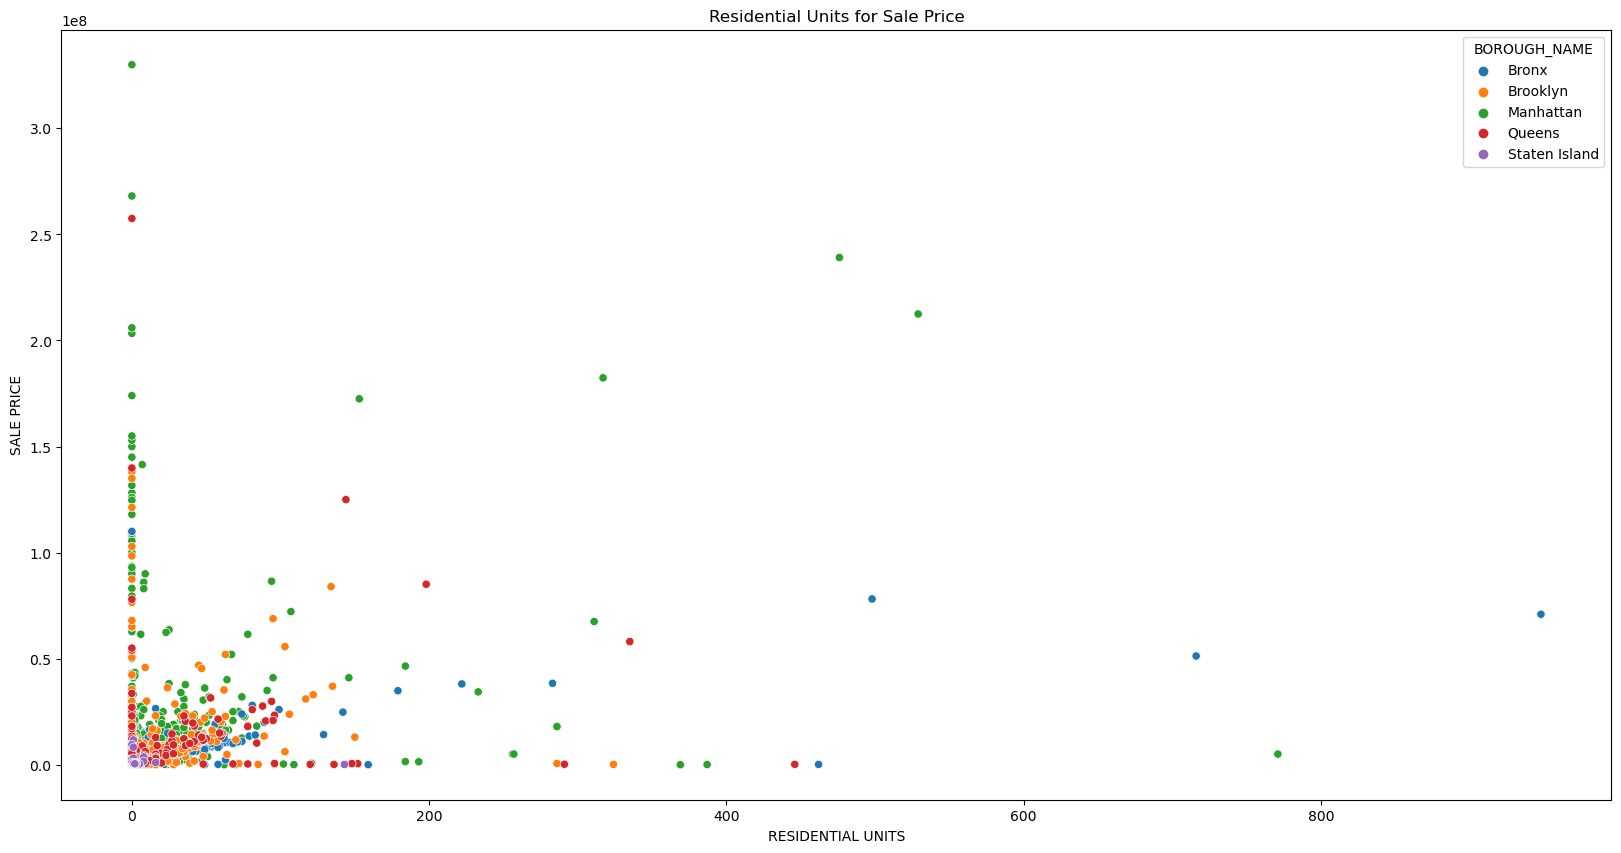

In [8]:
#plot residential units
plt.figure(figsize=(20,10))
sns.scatterplot(x='RESIDENTIAL UNITS', y="SALE PRICE", data=clean.df_housing, hue="BOROUGH_NAME", hue_order=borough_names)
plt.title('Residential Units for Sale Price')

Text(0.5, 1.0, 'Residential Units for Sale Price')

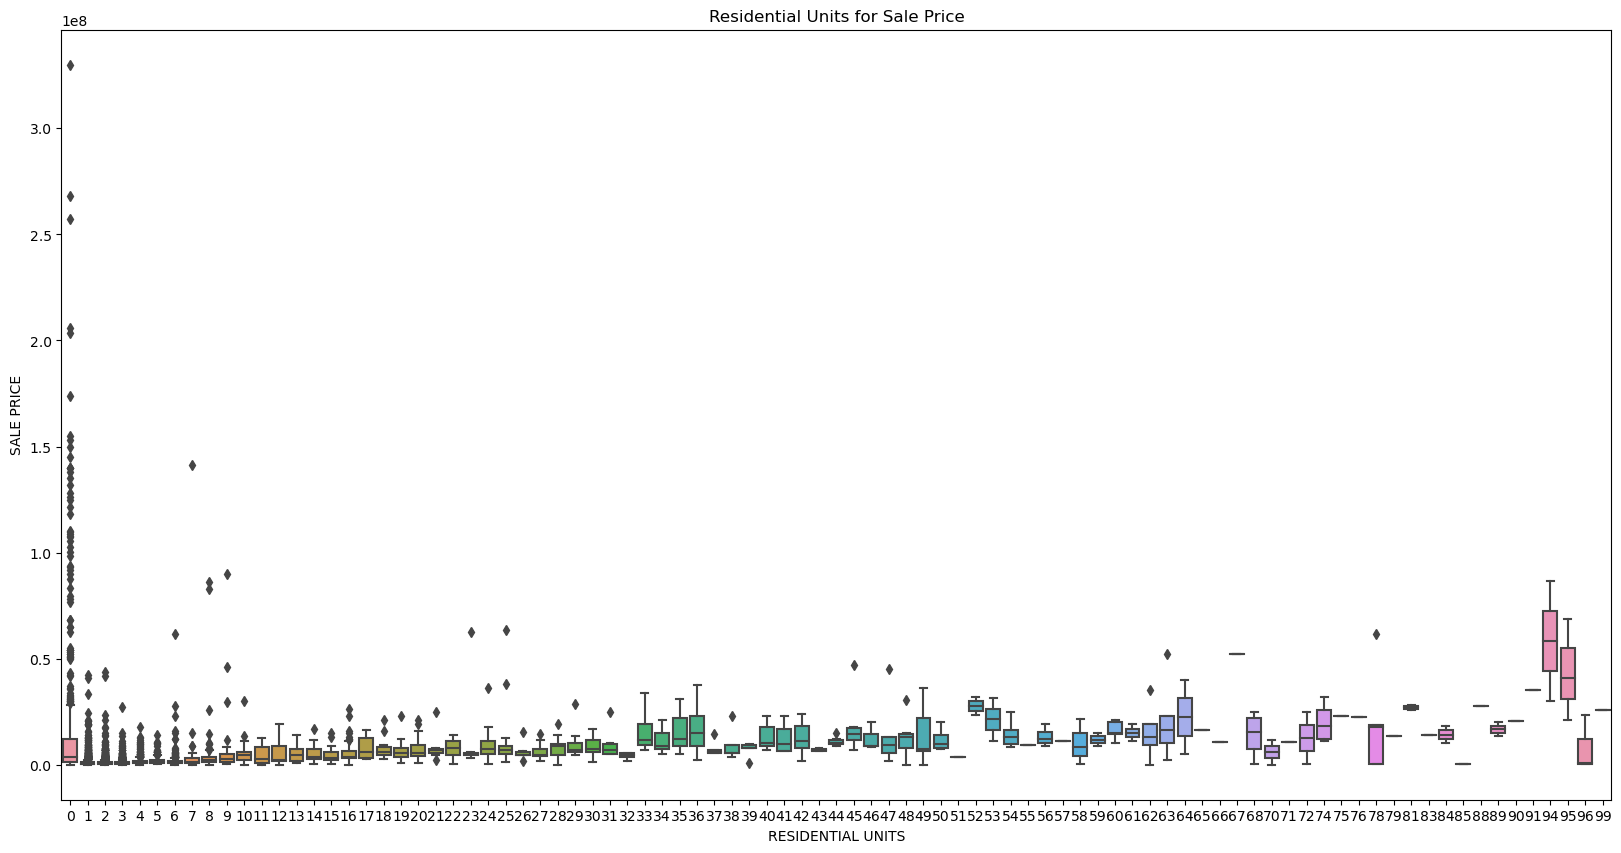

In [9]:
df_modified_housing = clean.df_housing[clean.df_housing["RESIDENTIAL UNITS"] < 100]
#df_modified_housing = df_modified_housing[df_modified_housing["SALE PRICE"] < 5000000]
#df_modified_housing = df_modified_housing[df_modified_housing["SALE PRICE"] > 10000]
#plot residential units
plt.figure(figsize=(20,10))
sns.boxplot(x='RESIDENTIAL UNITS', y="SALE PRICE", data=df_modified_housing)
plt.title('Residential Units for Sale Price')

We can see there is an upward trend in sale price when the number of residential units increases as expected

Now lets check the sales price per borough

<AxesSubplot:title={'center':'Sale Price'}, xlabel='SALE PRICE', ylabel='Count'>

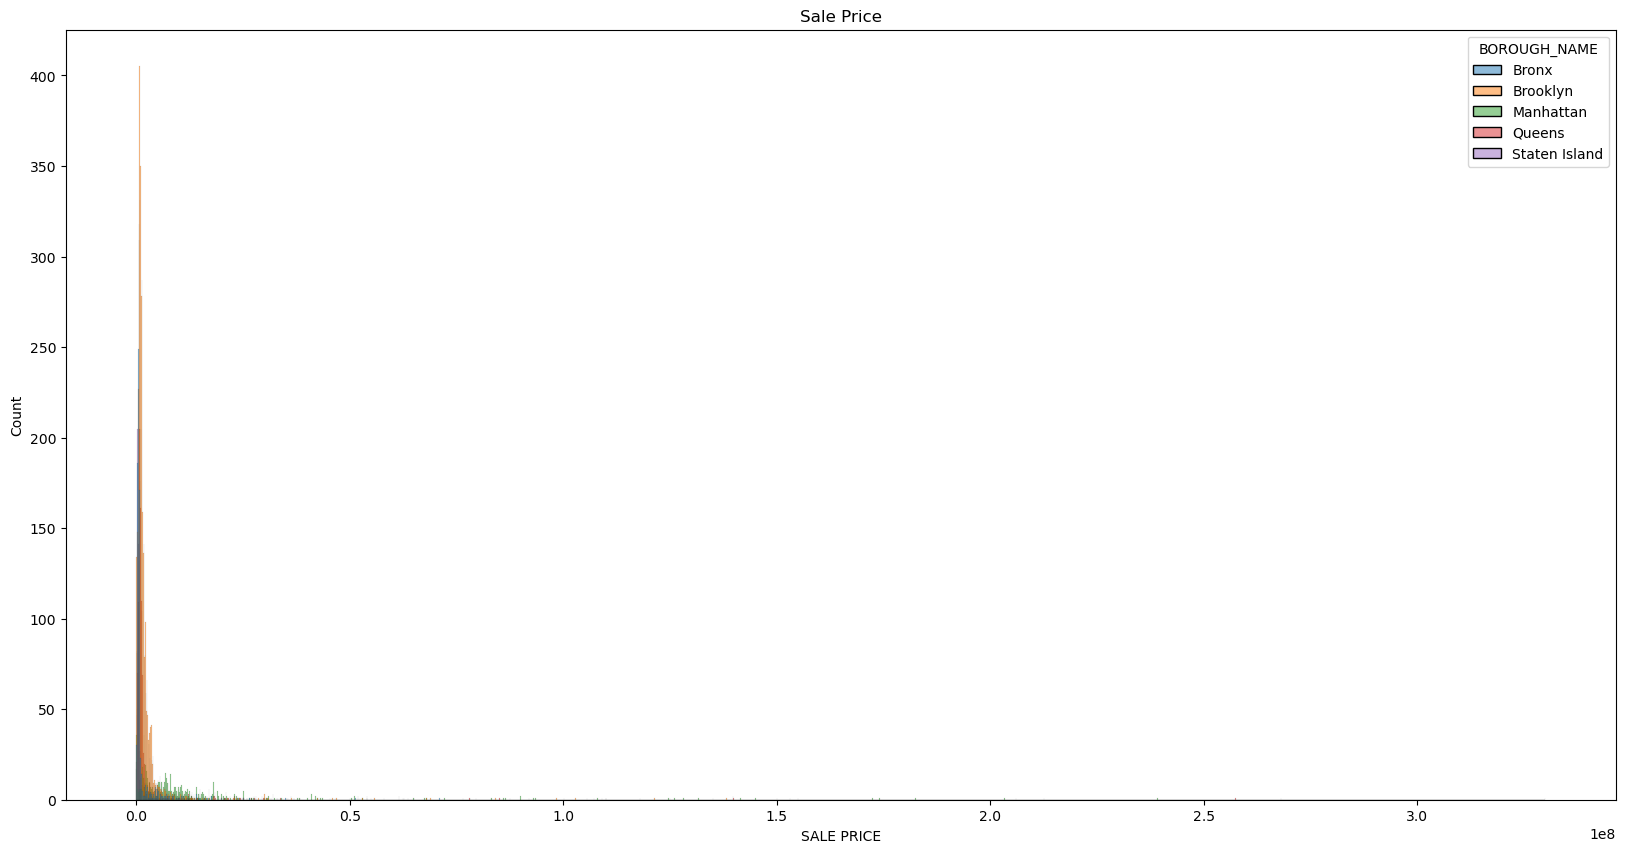

In [10]:
plt.figure(figsize = (20,10))
plt.title("Sale Price")
sns.histplot(data=clean.df_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

It is hard to see the distribution of Sales Prices because of the effect of the outliers
on the scaling of the chart.
Here the exercise is repeated with the outliers removed.

<AxesSubplot:title={'center':'Sale Price with outliers removed'}, xlabel='SALE PRICE', ylabel='Count'>

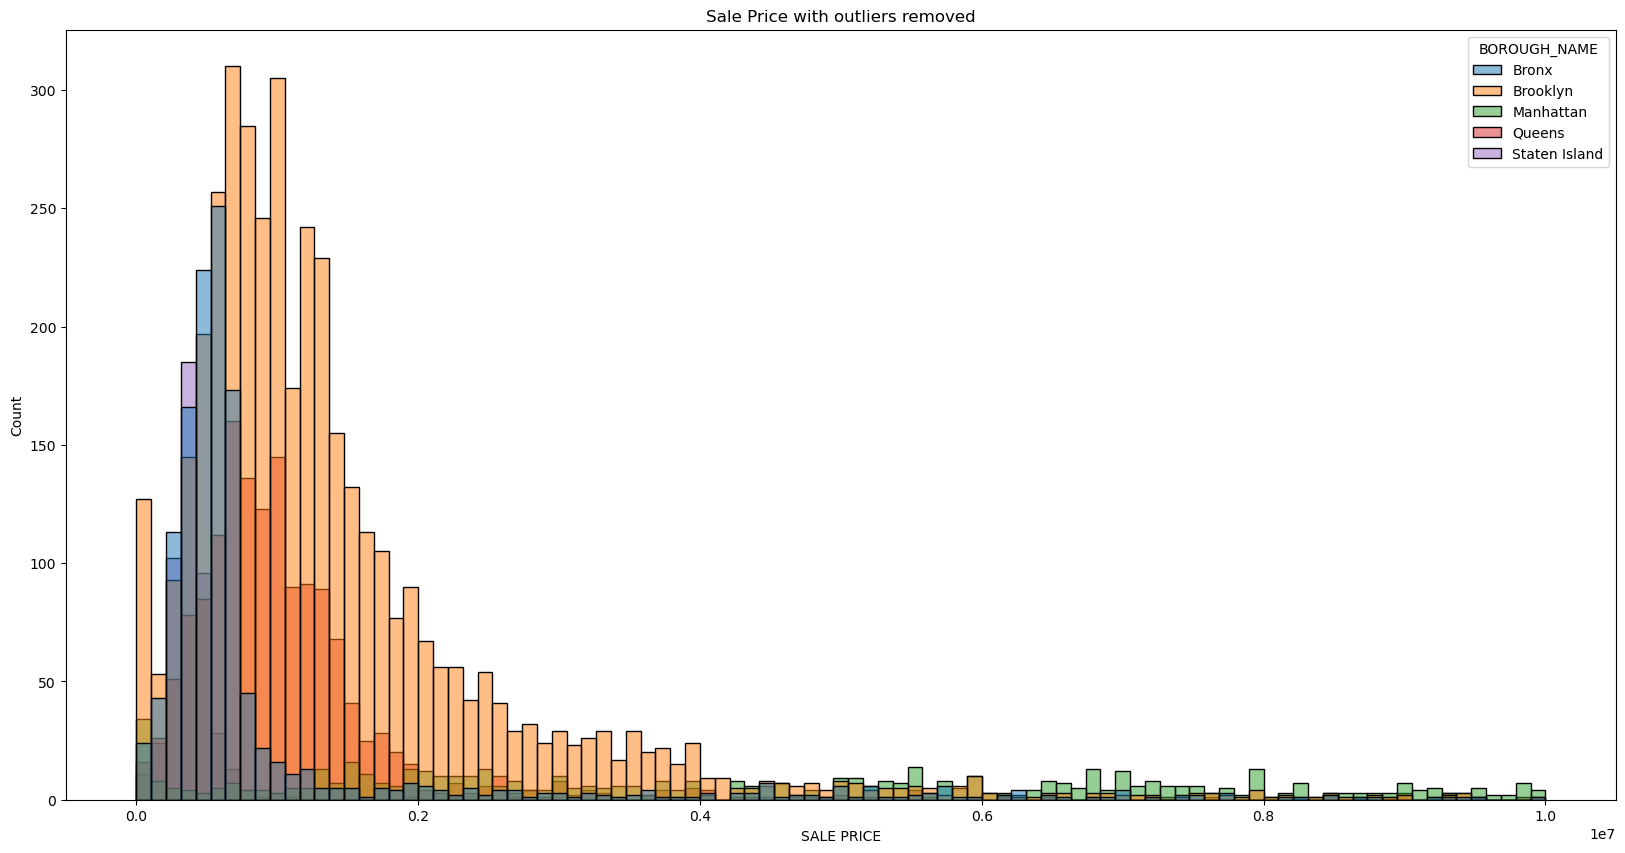

In [11]:
sale_limit = 10000000
df_new_housing = clean.df_housing[clean.df_housing["SALE PRICE"] < sale_limit]
plt.figure(figsize = (20,10))
plt.title("Sale Price with outliers removed")
sns.histplot(data=df_new_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)


We can see that most of the property prices are bunched up in the lower range of SALE PRICE.
There appears to be a clear difference in trends between each borough, so lets see below the differences between them.

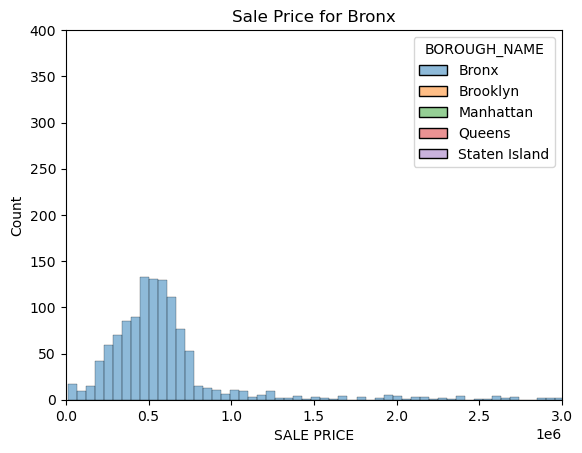

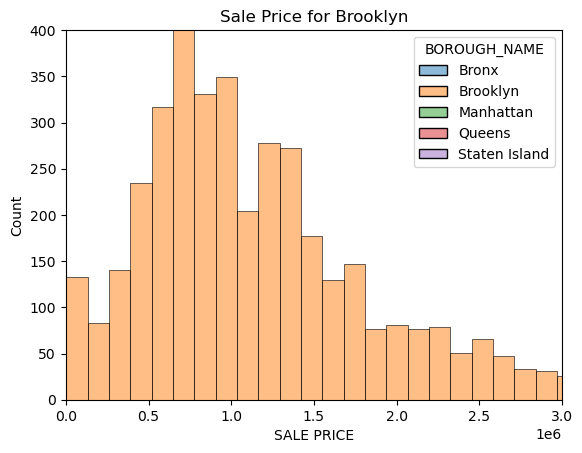

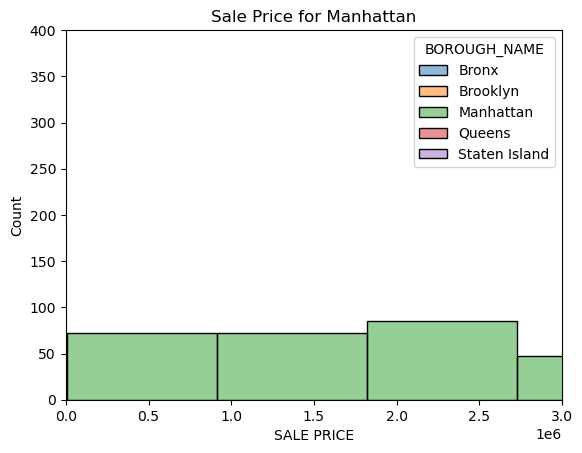

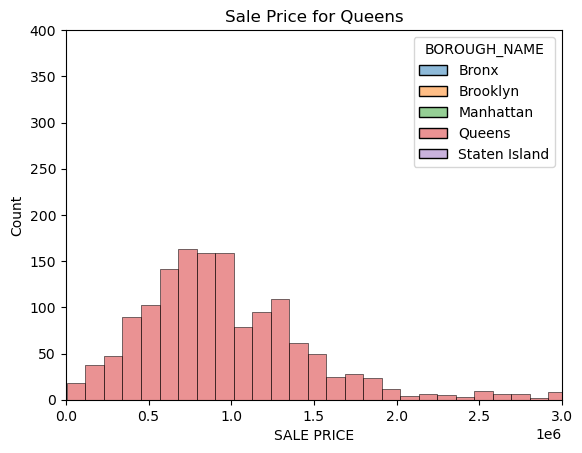

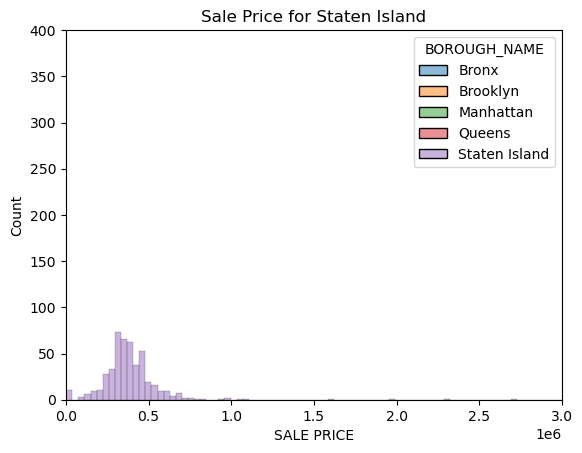

In [12]:

for name in borough_names:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.title(f"Sale Price for {name}")
    sns.histplot(data=df_borough_housing, x="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names, ax=ax)
    plt.title(f"Sale Price for {name}")
    ax.set_xlim(0,3000000)
    ax.set_ylim(0,400)

The charts approximate to a normal distribution. The axis scaling is the same so you can easily compare each borough, how big the sample sizes are and how much the SALE PRICE is.
The exception is the borough of Manhattan where there is a much bigger range of sale prices.

Check for correlation between TAX CLASS AT TIME OF SALE and BOROUGH_NAME

<AxesSubplot:title={'center':'Tax class at the time of sale for each borough'}, xlabel='TAX CLASS AT TIME OF SALE', ylabel='count'>

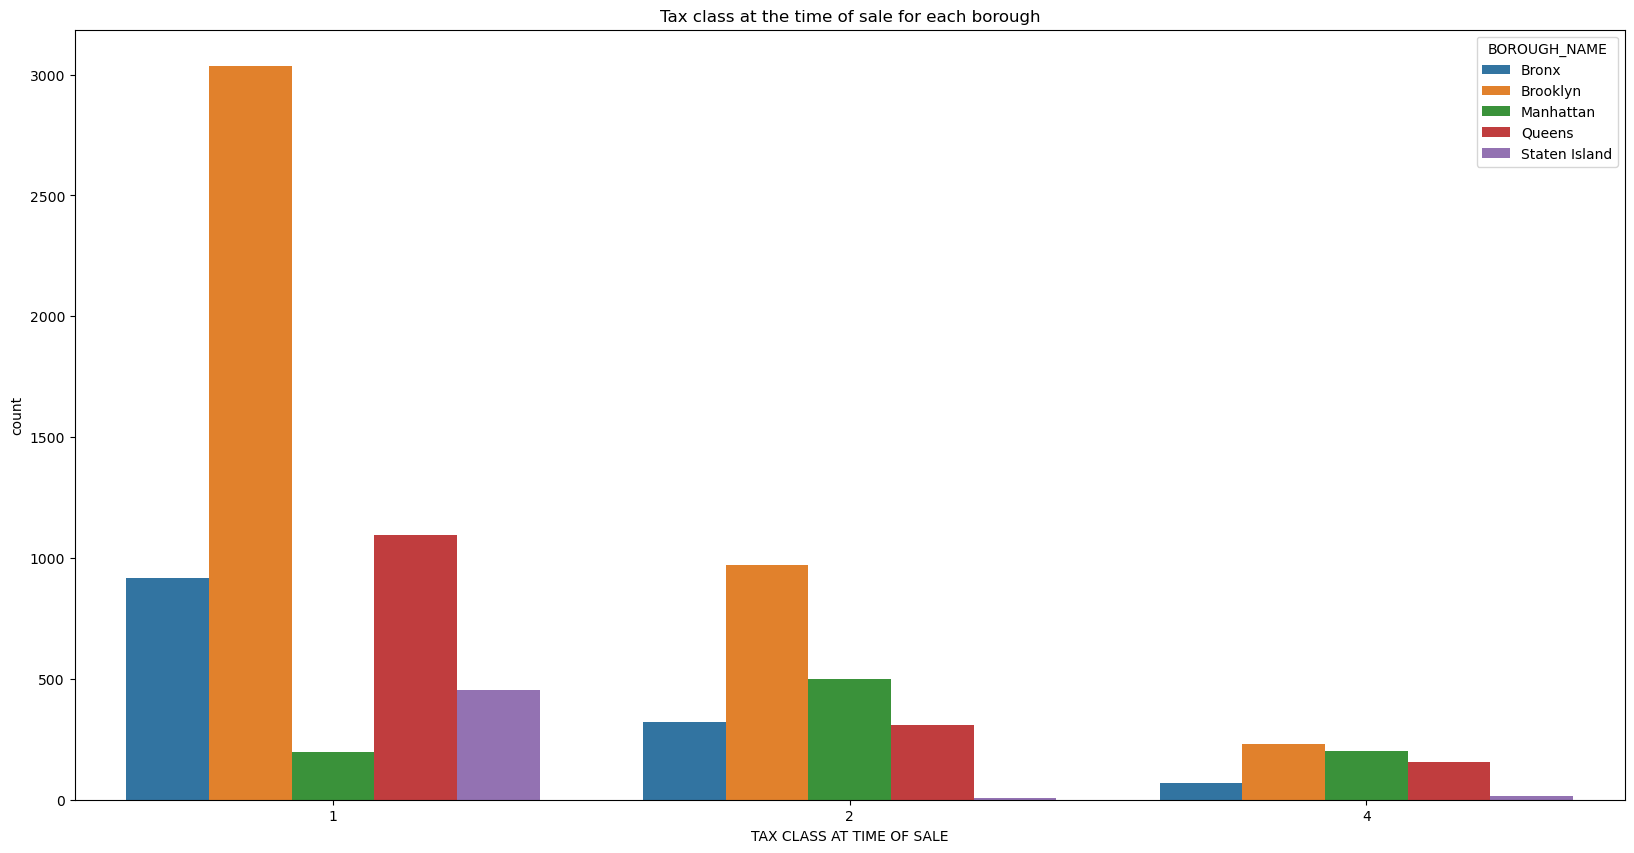

In [13]:
plt.figure(figsize = (20,10))
plt.title(f"Tax class at the time of sale for each borough")
sns.countplot(data=clean.df_housing, x="TAX CLASS AT TIME OF SALE", hue="BOROUGH_NAME", hue_order=borough_names)

As the Tax Class at the time of sale number increases, the number of properties decrease for each borough apart from Manhattan.

Find out about the relationship between land area and sales price.

<AxesSubplot:title={'center':'LAND SQUARE FEET for each borough'}, xlabel='LAND SQUARE FEET', ylabel='Count'>

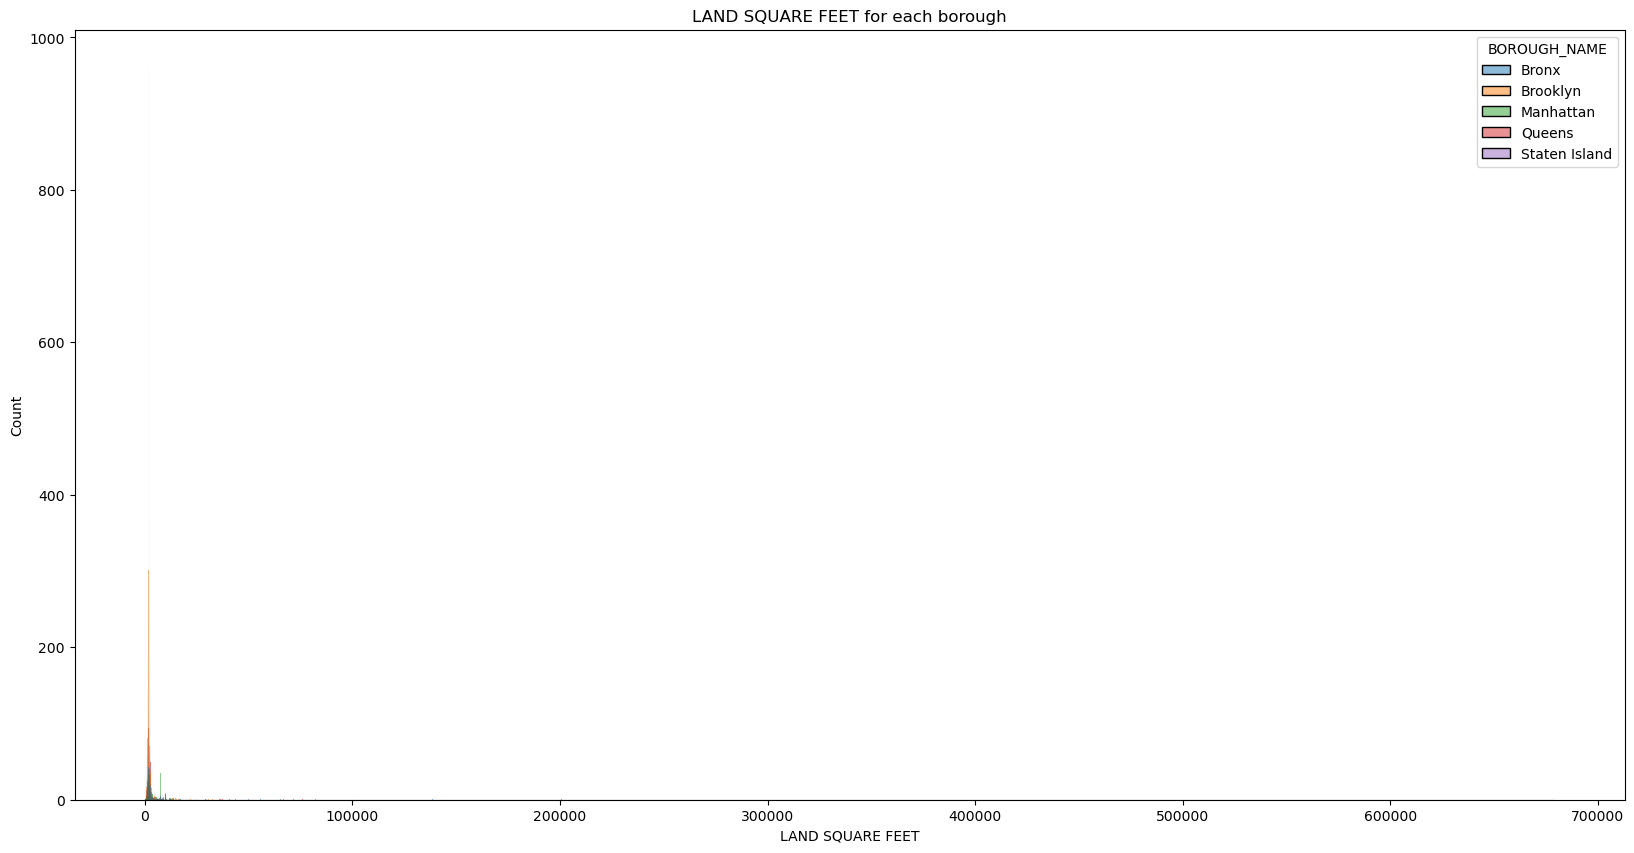

In [14]:
plt.figure(figsize = (20,10))
plt.title(f"LAND SQUARE FEET for each borough")
sns.histplot(data=clean.df_housing, x="LAND SQUARE FEET", hue="BOROUGH_NAME", hue_order=borough_names)

With the outliers removed there are 7819 entries


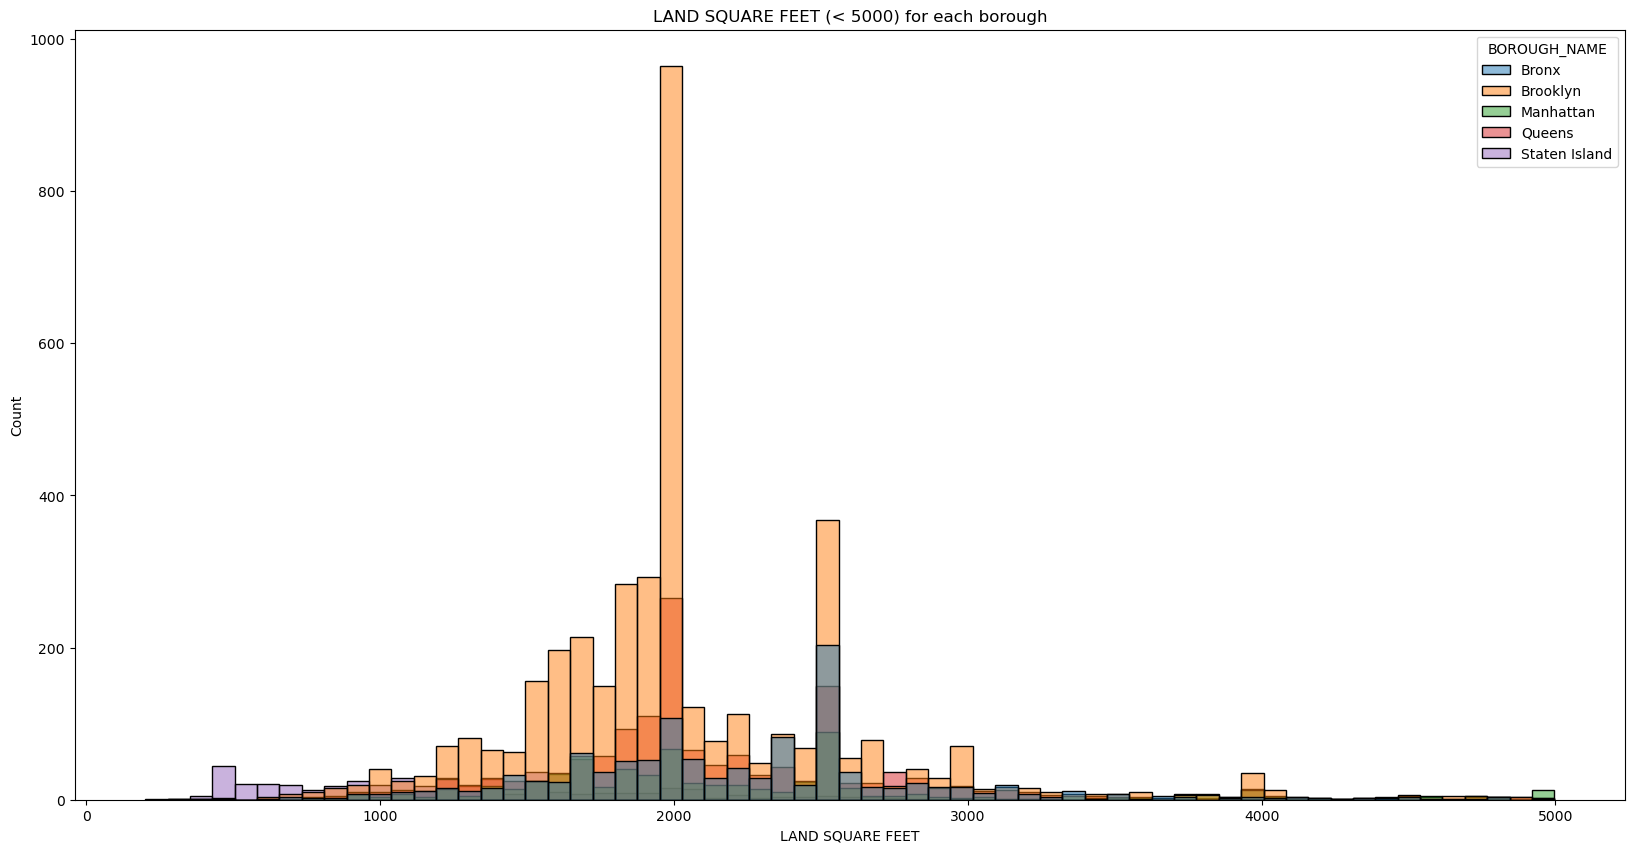

In [15]:
lsf_limit = 5000
df_modified_housing = clean.df_housing[clean.df_housing["LAND SQUARE FEET"] < lsf_limit]
plt.figure(figsize = (20,10))
plt.title(f"LAND SQUARE FEET (< {lsf_limit}) for each borough")
sns.histplot(data=df_modified_housing, x="LAND SQUARE FEET", hue="BOROUGH_NAME", hue_order=borough_names)
print(f"With the outliers removed there are {len(df_modified_housing)} entries")

<AxesSubplot:title={'center':'LAND SQUARE FEET vs SALE PRICE for each borough'}, xlabel='LAND SQUARE FEET', ylabel='SALE PRICE'>

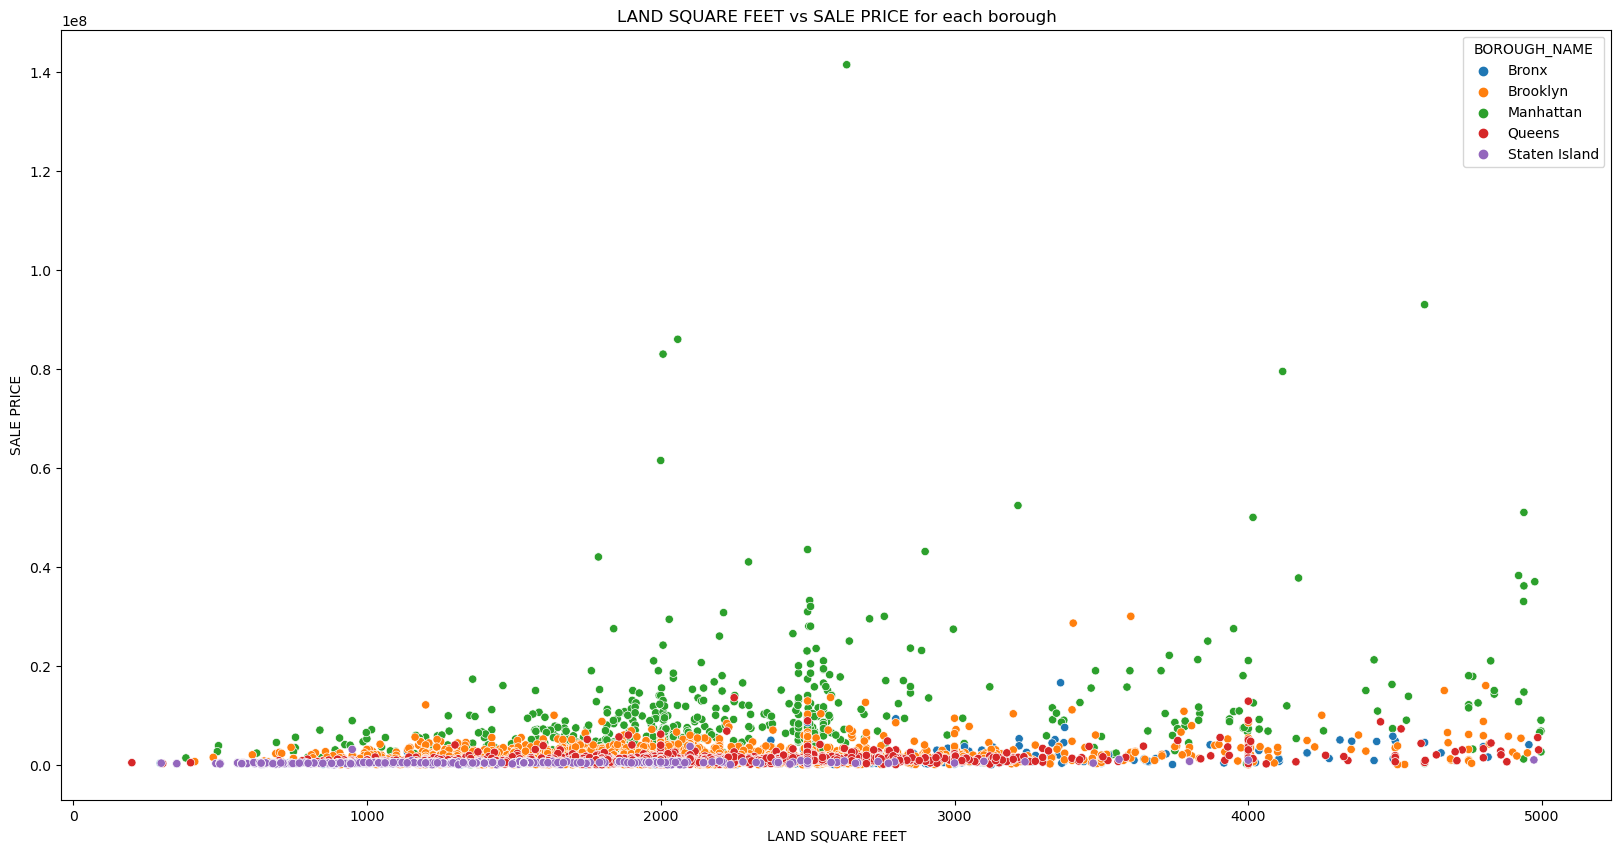

In [16]:
plt.figure(figsize = (20,10))
plt.title(f"LAND SQUARE FEET vs SALE PRICE for each borough")
sns.scatterplot(data=df_modified_housing, x="LAND SQUARE FEET", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)


For the lower price there is likely to be less Land Square Feet. For the higher range in Land Square Feet the Sale Price is more evenly distributed.

Now do the same for Gross Square Feet

<AxesSubplot:title={'center':'GROSS SQUARE FEET for each borough'}, xlabel='GROSS SQUARE FEET', ylabel='Count'>

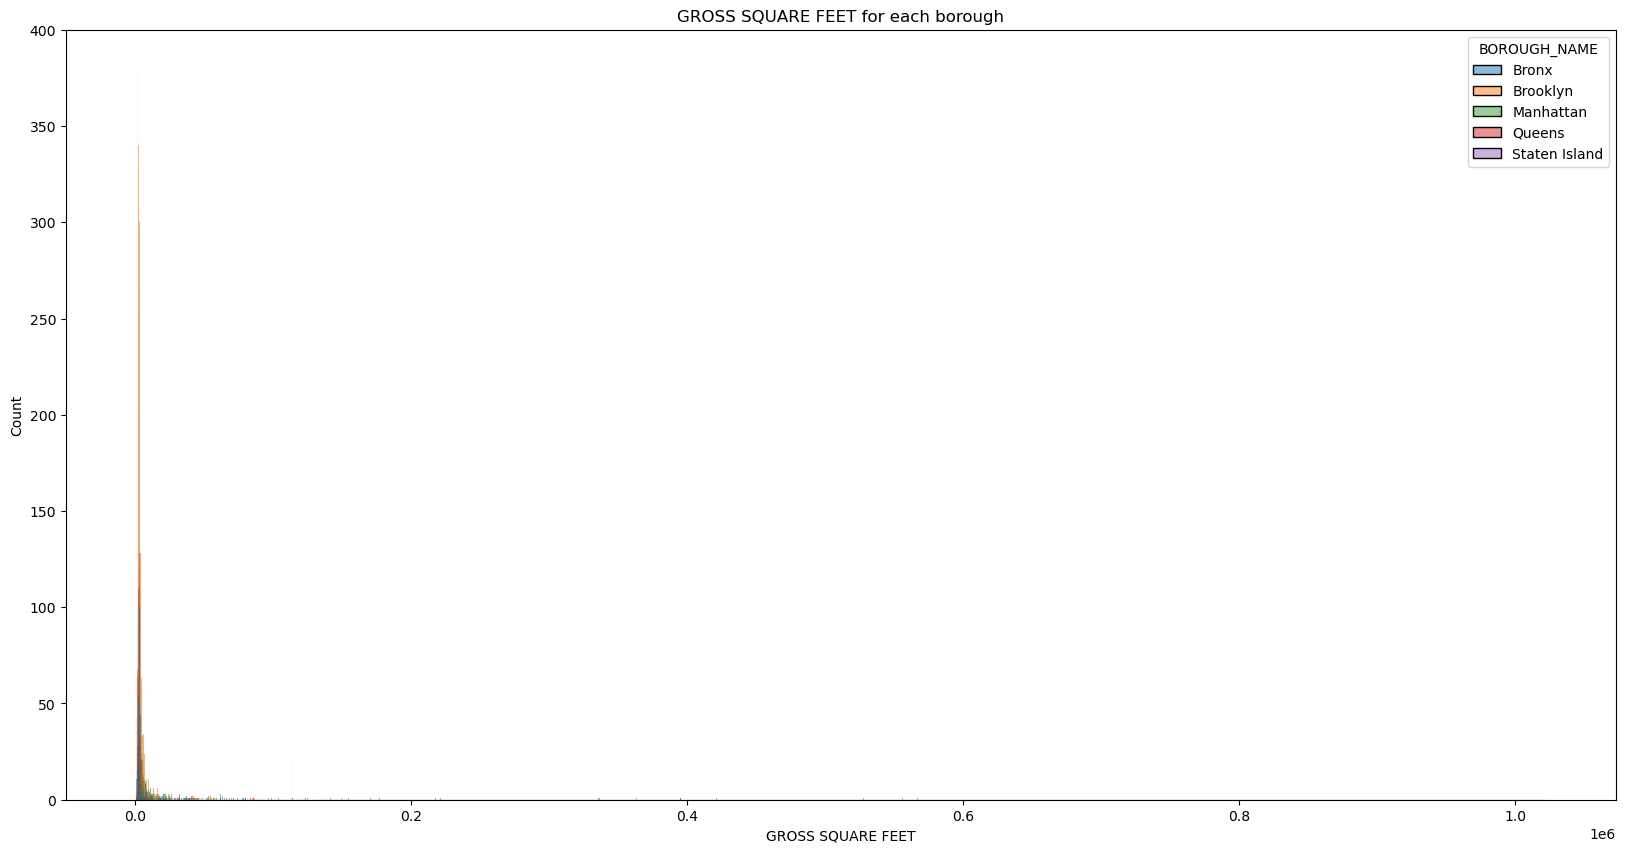

In [17]:
plt.figure(figsize = (20,10))
plt.title(f"GROSS SQUARE FEET for each borough")
sns.histplot(data=clean.df_housing, x="GROSS SQUARE FEET", hue="BOROUGH_NAME", hue_order=borough_names)

With the outliers removed there are 7617 entries


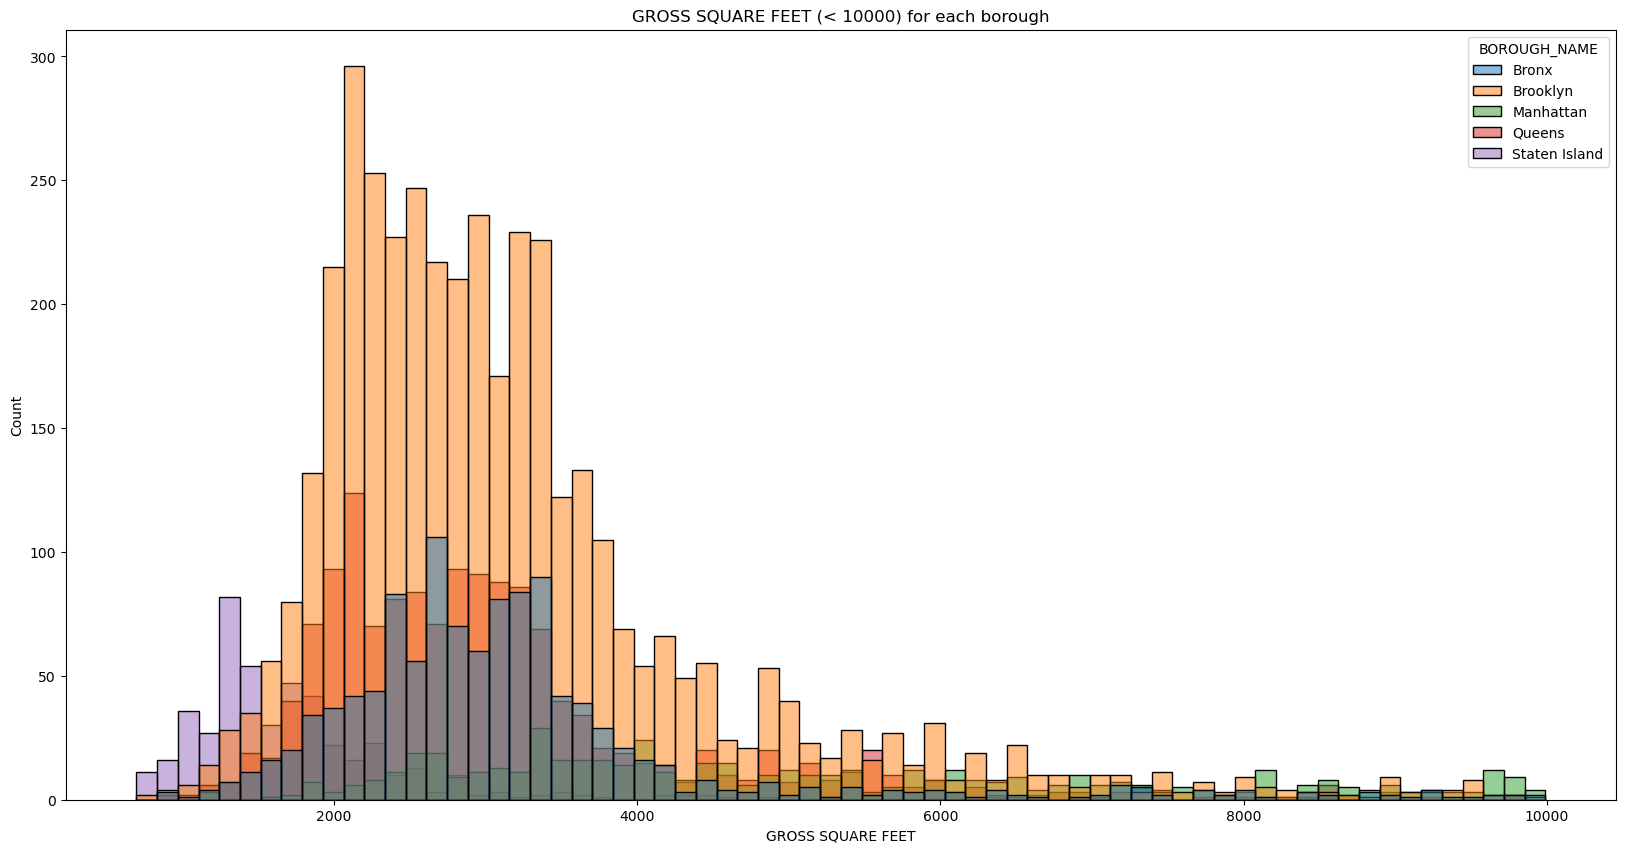

In [18]:
gsf_limit = 10000
df_modified_housing = clean.df_housing[clean.df_housing["GROSS SQUARE FEET"] < gsf_limit]
plt.figure(figsize = (20,10))
plt.title(f"GROSS SQUARE FEET (< {gsf_limit}) for each borough")
sns.histplot(data=df_modified_housing, x="GROSS SQUARE FEET", hue="BOROUGH_NAME", hue_order=borough_names)
print(f"With the outliers removed there are {len(df_modified_housing)} entries")

<AxesSubplot:title={'center':'GROSS SQUARE FEET vs SALE PRICE for each borough'}, xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

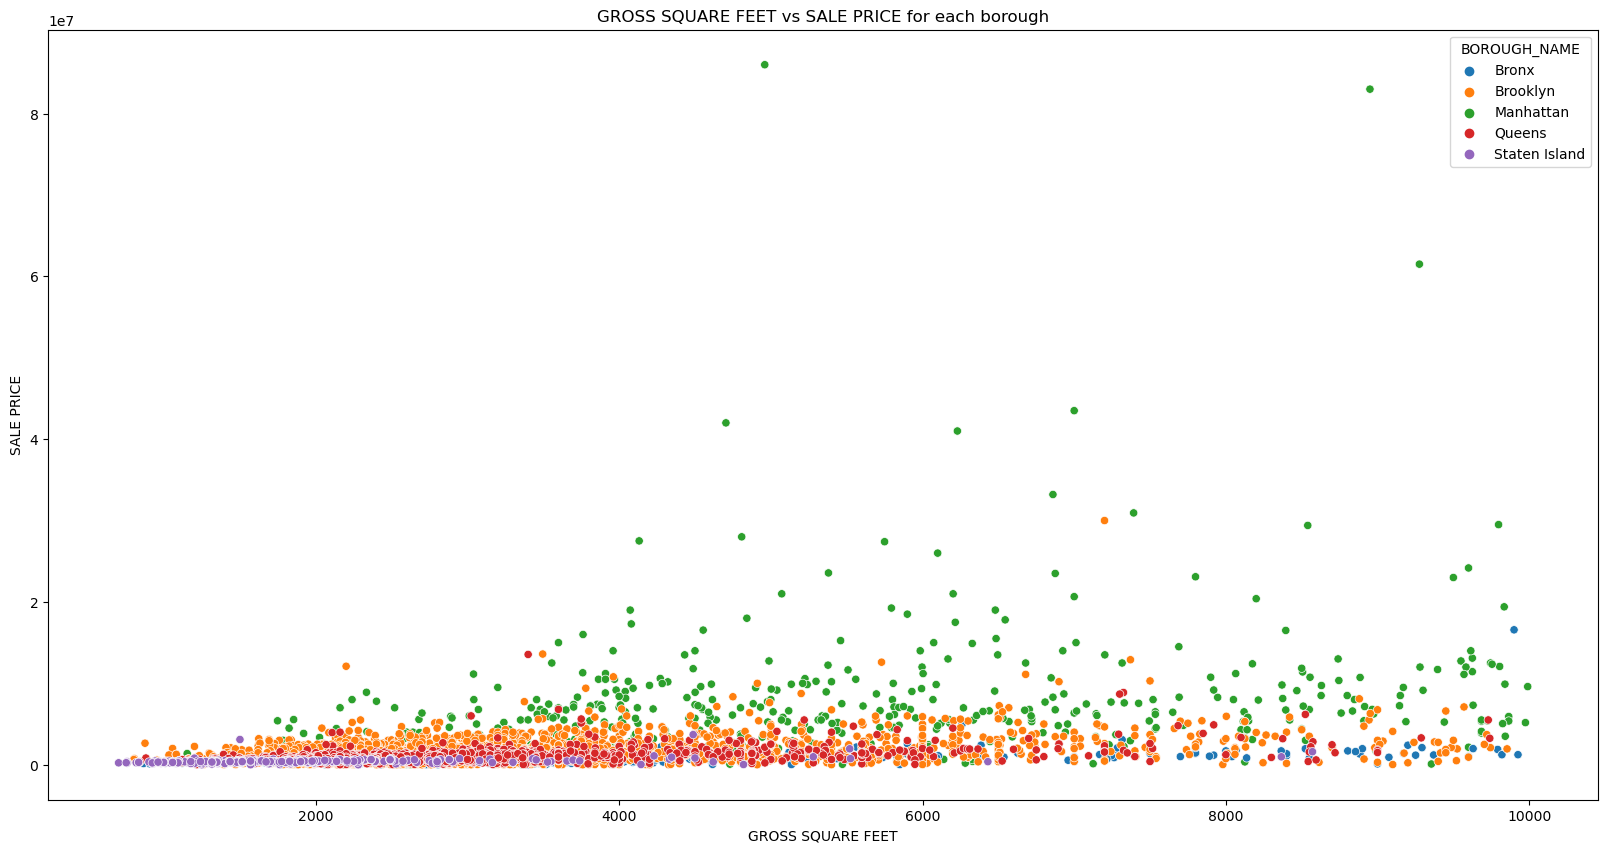

In [19]:
plt.figure(figsize = (20,10))
plt.title(f"GROSS SQUARE FEET vs SALE PRICE for each borough")
sns.scatterplot(data=df_modified_housing, x="GROSS SQUARE FEET", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)

Here the relationship is clearer. The greater the GROSS SQUARE FEET, the greater the SALE PRICE

Find out about the relationship between the Tax Block and the Sale Price

Text(0.5, 1.0, 'Sale price by tax block')

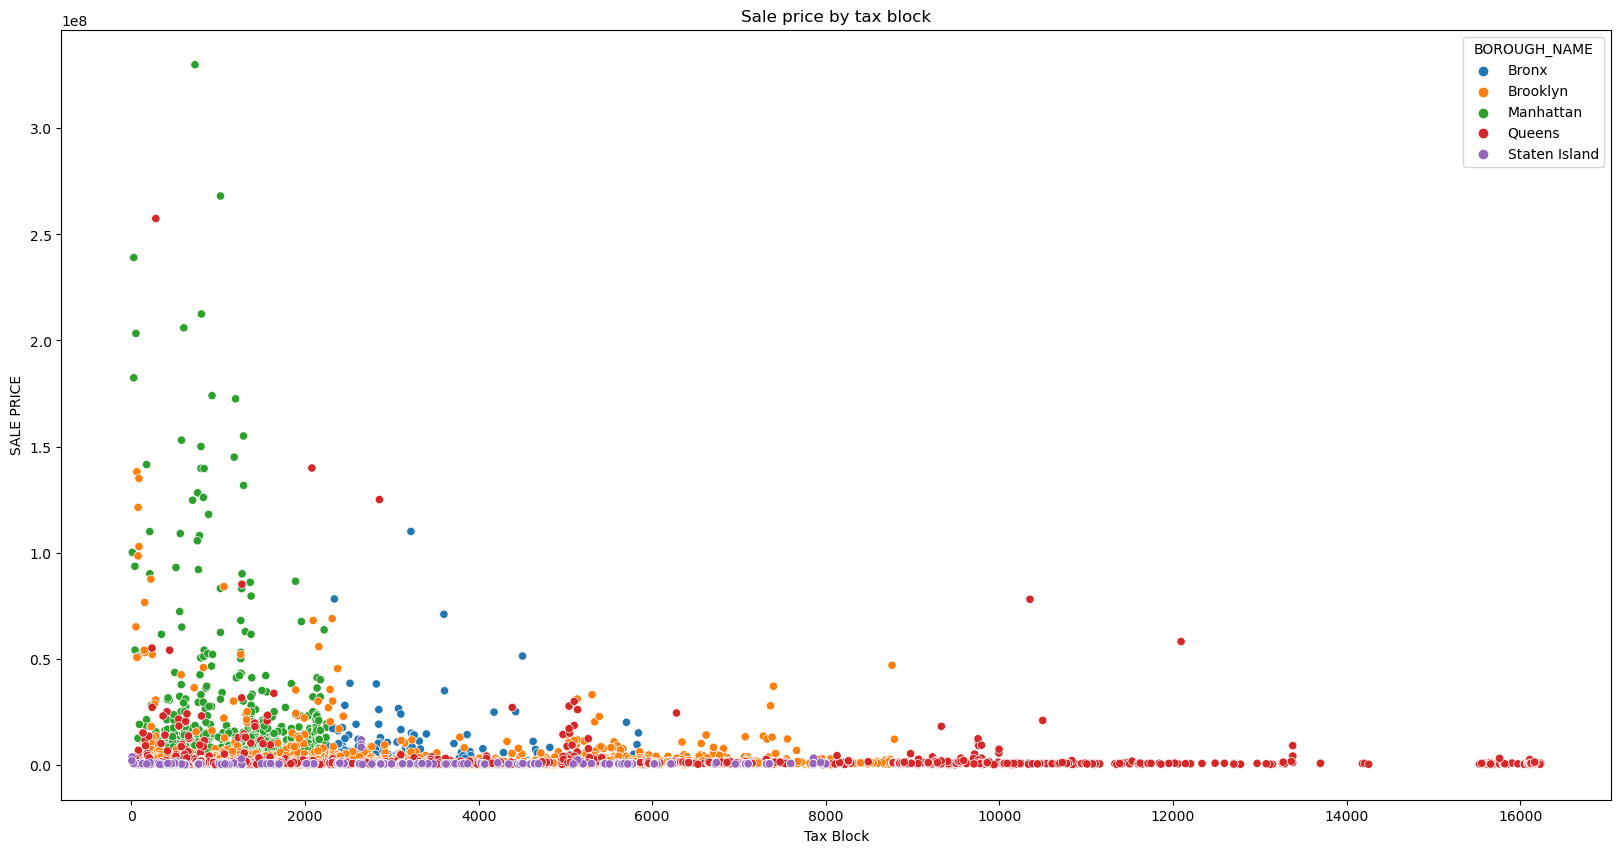

In [20]:
plt.figure(figsize = (20,10))
sns.scatterplot(data=clean.df_housing, x="Tax Block", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names)
plt.title("Sale price by tax block")

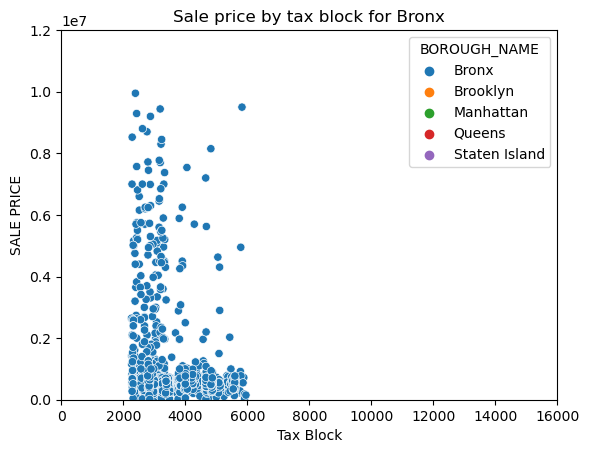

<Figure size 2000x1000 with 0 Axes>

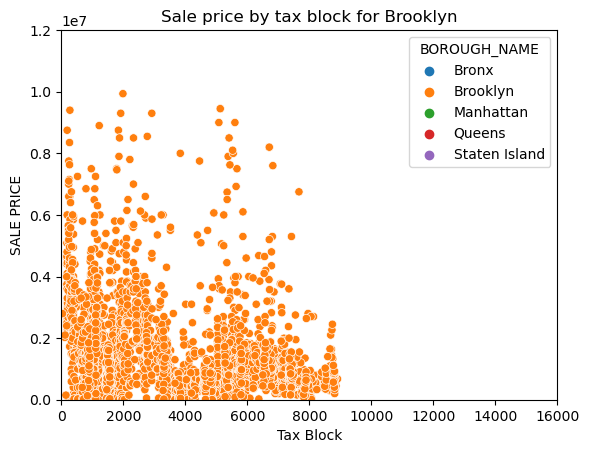

<Figure size 2000x1000 with 0 Axes>

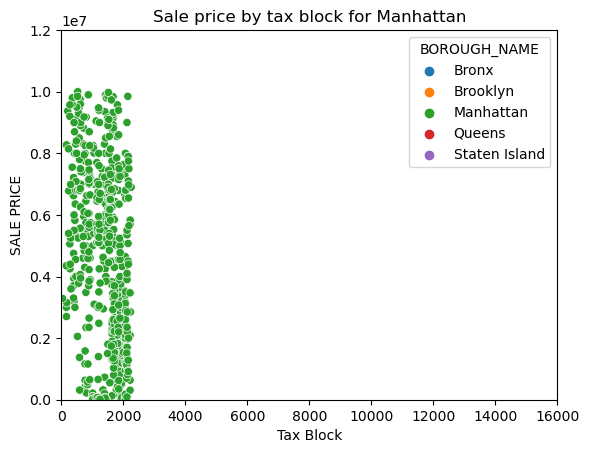

<Figure size 2000x1000 with 0 Axes>

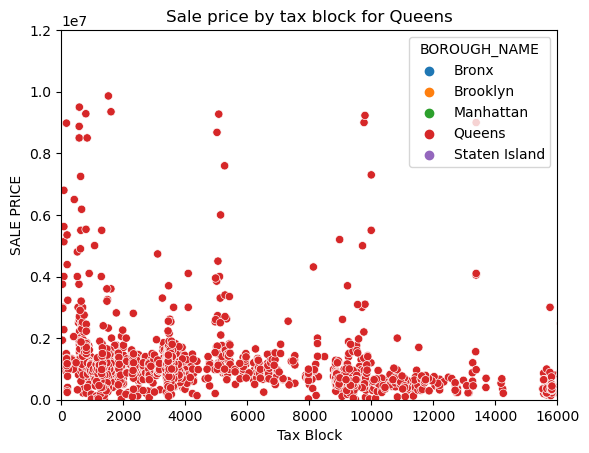

<Figure size 2000x1000 with 0 Axes>

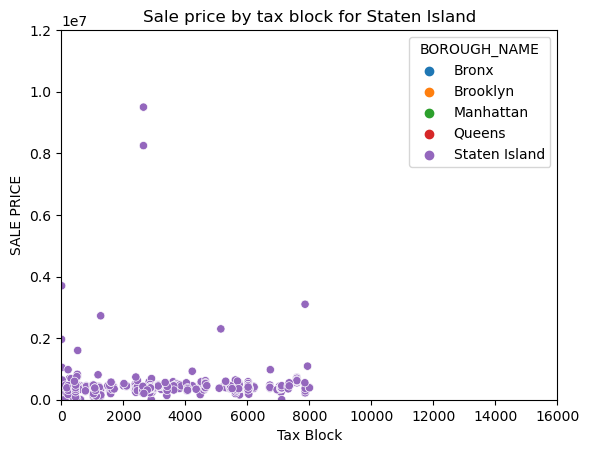

<Figure size 2000x1000 with 0 Axes>

In [21]:
for name in borough_names:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.title(f"Sale price by tax block for {name}")
    plt.figure(figsize = (20,10))
    sns.scatterplot(data=df_borough_housing, x="Tax Block", y="SALE PRICE", hue="BOROUGH_NAME", hue_order=borough_names, ax=ax)
    ax.set_xlim(0,16000)
    ax.set_ylim(0,12000000)

Tax Block has some predictive capability. Each borough has a range of tax block values and so a value outside of the range for a particular borough cannot be from that borough. In turn the borough that it is will have a different price range frm the other boroughs, so there is likely to be some correlation between the tax block and the property price.

There are some very distinctive patterns here where some boroughs contain properties that have a specific range of tax blocks and no outliers outside that range.

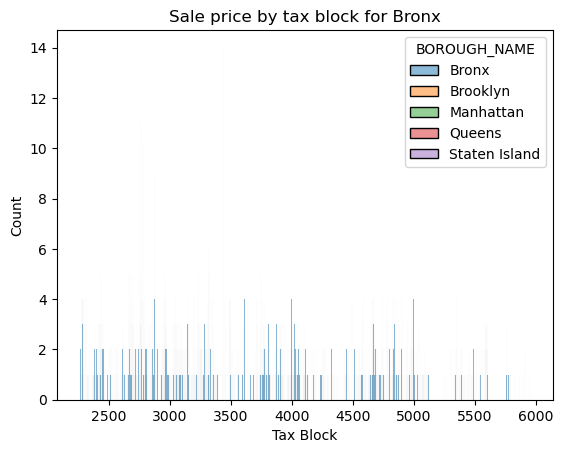

<Figure size 2000x1000 with 0 Axes>

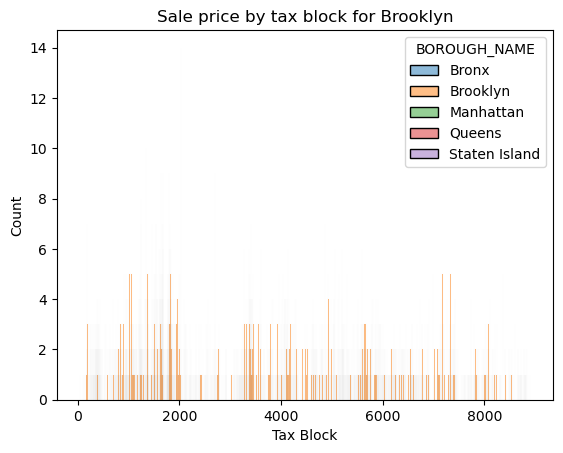

<Figure size 2000x1000 with 0 Axes>

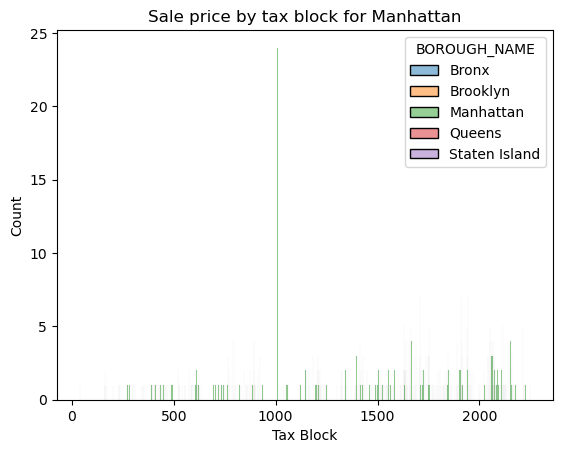

<Figure size 2000x1000 with 0 Axes>

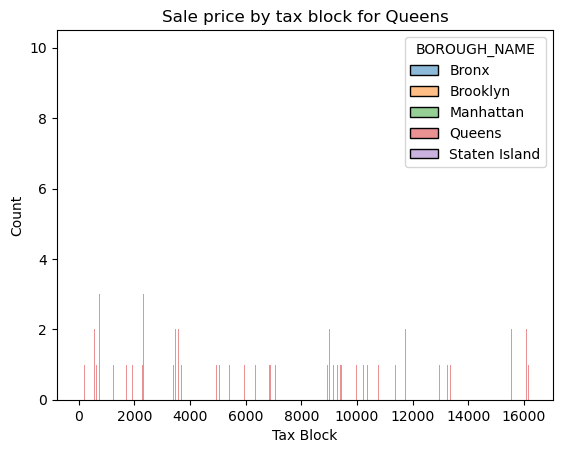

<Figure size 2000x1000 with 0 Axes>

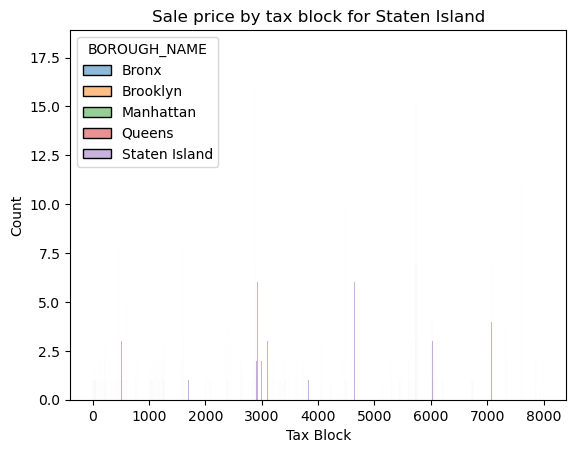

<Figure size 2000x1000 with 0 Axes>

In [22]:
for name in borough_names:
    fig, ax = plt.subplots()
    df_borough_housing = df_new_housing[df_new_housing["BOROUGH_NAME"] == name]
    plt.title(f"Sale price by tax block for {name}")
    plt.figure(figsize = (20,10))
    sns.histplot(data=df_borough_housing, x="Tax Block", hue="BOROUGH_NAME", hue_order=borough_names, ax=ax)


There are 7626 entries


Text(0.5, 1.0, 'Variable Correlation')

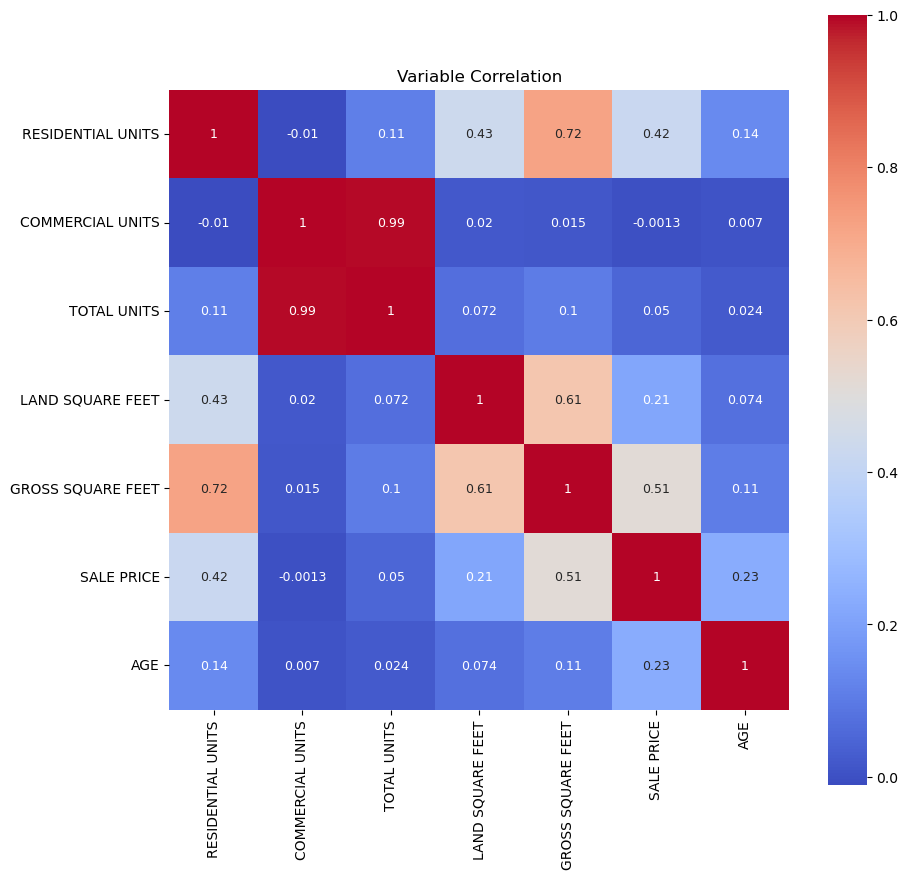

In [23]:
#correlation matrix
df_new_housing = clean.df_housing[clean.df_housing["SALE PRICE"] < sale_limit]
#df_new_housing = df_new_housing[df_new_housing["GROSS SQUARE FEET"] < gsf_limit]
df_new_housing = df_new_housing[df_new_housing["LAND SQUARE FEET"] < lsf_limit]
#df_new_housing = df_lst_housing[df_lst_housing["GROSS SQUARE FEET"] < gsf_limit]
print(f"There are {len(df_new_housing)} entries")
df_new_housing = df_new_housing.drop(columns=["SALE_MONTH"])
corrmat = df_new_housing.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, cmap = 'coolwarm', square=True, annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

Having Experimented with differet permutations, filtering the SALE PRICE < 100000 and 
the LAND SQUARE FEET < 5000 goves the best correlations 
We get good correlations for SALE PRICE with RESIDENTIAL UNITS and GROSS SQUARE FEET,  
and weak correlations with LAND SQUARE FEET and AGE

I attempted to use the Nominal Association package to obtain the correaation between SALE PRICE and the categorical features. However this did not work because it only works with categorical features, whereas SALE PRICE is a numerical feature. 

So instead I used ANOVA, see the reference https://thinkingneuron.com/how-to-measure-the-correlation-between-a-numeric-and-a-categorical-variable-in-python/ for an example close to what we are doing.
Running the one-way anova test between SALE PRICE and the different categories in the dataset.
Assumption(H0) is that SALE PRICE and the categories are NOT correlated.

In [30]:
print("Find the correlation between SALE PRICE and the following:")
for name in clean.alpha_names:
    #CategoryGroupLists2=df_new_housing.groupby(name)['SALE PRICE']
    #CategoryGroupLists1 = CategoryGroupLists2.filter(lambda x: len(x) > 0)
    #CategoryGroupLists = CategoryGroupLists1.apply(list)
    #CategoryGroupLists = CategoryGroupLists.where(len())
    CategoryGroupLists=df_new_housing.groupby(name)['SALE PRICE'].apply(list)

    # Remove empty lists from the CategoryGroupLists
    # Empty lists cause ANOVA to return nan
    for idx in (CategoryGroupLists.index):
        if len(CategoryGroupLists[idx]) == 0:
            del CategoryGroupLists[idx]

    # Performing the ANOVA test
    # We accept the Assumption(H0) only when P-Value > 0.05
    AnovaResults = f_oneway(*CategoryGroupLists)
    print(f'{name} P-Value for Anova is: ', round(AnovaResults[1], 5)) 
    print("---------------")

Find the correlation between SALE PRICE and the following:
NEIGHBORHOOD P-Value for Anova is:  0.0
---------------
BUILDING CLASS CATEGORY P-Value for Anova is:  0.0
---------------
TAX CLASS AT PRESENT P-Value for Anova is:  0.0
---------------
Tax Block P-Value for Anova is:  0.0
---------------
BUILDING CLASS AT TIME OF SALE P-Value for Anova is:  0.0
---------------
BOROUGH_NAME P-Value for Anova is:  0.0
---------------
TAX CLASS AT TIME OF SALE P-Value for Anova is:  0.0
---------------


The P value for each category is zero.
Next go to Task1_clean_pt2.ipynb to remove the outliers discovered via this EDA